# Task
1. The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is
flattened to a 1D vector of size 4,096. Forty different people were photographed (10 times each), and
the usual task is to train a model that can predict which person is represented in each picture.

---

 - Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function
 - Split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1).
Since the dataset is quite small, you will probably want to use stratified sampling to ensure that there
are the same number of images per person in each set.
 - Next, cluster the images using k-means, and
ensure that you have a good number of clusters
 - Visualize the clusters: do you see similar faces in each cluster?

In [ ]:
import sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from packaging import version
import sys

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
assert sys.version_info >= (3, 7)

Load data

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [ ]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [ ]:
olivetti.images.shape

(400, 64, 64)

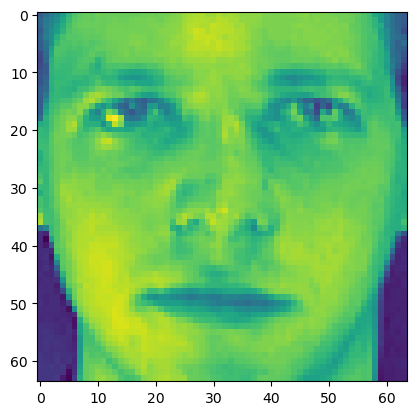

In [ ]:
plt.imshow(olivetti.images[0])

In [ ]:
def plot_faces(faces, labels, n_cols=20):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
        plt.tight_layout()
    plt.show()

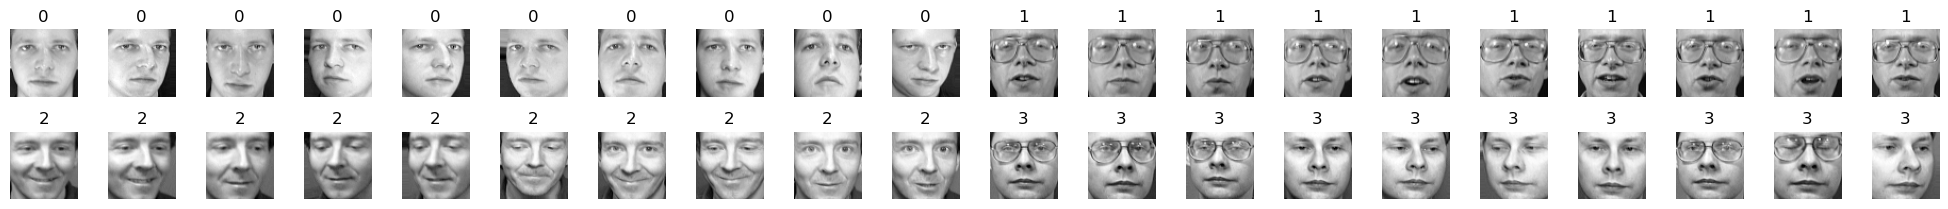

In [9]:
plot_faces(olivetti.data[:40], olivetti.target[:40])

In [10]:
olivetti.data.shape

(400, 4096)

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

In [12]:
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)

In [13]:
train_init_idx, test_idx = next(stratified_split.split(olivetti.data, olivetti.target))

In [14]:
# train + dev set
train_init_features = olivetti.data[train_init_idx]
train_init_target = olivetti.target[train_init_idx]

# test set
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

In [15]:
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=42)

In [16]:
train_idx, val_idx = next(stratified_split.split(train_init_features, train_init_target))

In [17]:
# train set
X_train = olivetti.data[train_idx]
y_train = olivetti.target[train_idx]

# dev set
X_dev = olivetti.data[val_idx]
y_dev = olivetti.target[val_idx]

In [18]:
print(f'Размеры выборок:\n - train {X_train.shape}\n - dev {X_dev.shape}\n - test {X_test.shape}')

Размеры выборок:
 - train (280, 4096)
 - dev (80, 4096)
 - test (40, 4096)


## clustering

PCA

In [19]:
from sklearn.decomposition import PCA

In [20]:
%%time
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)
X_dev_pca = pca.transform(X_dev)
X_test_pca = pca.transform(X_test)

pca.n_components_

CPU times: total: 391 ms
Wall time: 155 ms


104

In [21]:
from sklearn.cluster import KMeans

In [22]:
k = np.arange(1, 100, 2)
k = 15

In [23]:
clast = KMeans(n_clusters=k, n_init=10, random_state=42)

In [24]:
clast.fit(X_train_pca)

AttributeError: 'NoneType' object has no attribute 'split'